# Part A2: Entropy & Mathematical Formulas

## Introduction

Welcome to **Part A2** of the Softmax Series!

**StatQuest Style**: "Now that we understand surprise intuitively, let's do the math... clearly!"

### What We'll Cover

1. The mathematical formula for surprise: -log₂(p)
2. Why we use logarithms (4 key properties)
3. From surprise to entropy (expected value)
4. Complete worked examples with calculations
5. Visualizations and interpretations

### Learning Objectives

By the end of this notebook, you will:
- Calculate surprise using -log₂(p)
- Understand why logarithms are perfect for this
- Calculate entropy for any probability distribution
- Interpret entropy values

**Let's dive into the math!**

## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

print('✓ Libraries imported')
print('✓ Ready to calculate entropy!')

✓ Libraries imported
✓ Ready to calculate entropy!


---

# Part 1: The Surprise Formula

## Why Use Logarithms?

We need a mathematical function that:
1. **Decreases** as probability increases
2. Equals **0** when p = 1.0 (no surprise for certain events)
3. Approaches **∞** when p → 0 (infinite surprise for impossible events)
4. Is **additive** for independent events

The **logarithm** satisfies ALL these properties!

```
┌─────────────────────────────────────────────────────────────┐
│              SURPRISE FORMULA DERIVATION                    │
├─────────────────────────────────────────────────────────────┤
│                                                             │
│  For an event x with probability p(x):                     │
│                                                             │
│  Surprise(x) = log(1/p(x))                                 │
│                                                             │
│  Using logarithm properties: log(1/x) = -log(x)            │
│                                                             │
│  Surprise(x) = -log₂(p(x))                                 │
│                                                             │
│  Why log₂ (base 2)?                                        │
│  • Measures information in BITS                            │
│  • 1 bit = answer to one yes/no question                   │
│  • Standard in information theory                          │
│                                                             │
│  Alternative bases:                                        │
│  • log₁₀: measures in digits                               │
│  • ln (natural log): measures in nats                      │
│  • All equivalent, just different units                    │
│                                                             │
└─────────────────────────────────────────────────────────────┘
```

## Property 1: Inverse Relationship

```
┌─────────────────────────────────────────────────────────────┐
│         PROPERTY 1: INVERSE RELATIONSHIP                    │
├─────────────────────────────────────────────────────────────┤
│                                                             │
│  As p increases, -log₂(p) decreases:                       │
│                                                             │
│  p = 1.0  →  -log₂(1.0) = 0.00 bits                       │
│  p = 0.5  →  -log₂(0.5) = 1.00 bits                       │
│  p = 0.25 →  -log₂(0.25) = 2.00 bits                      │
│  p = 0.125→  -log₂(0.125) = 3.00 bits                     │
│  p = 0.1  →  -log₂(0.1) = 3.32 bits                       │
│  p = 0.01 →  -log₂(0.01) = 6.64 bits                      │
│                                                             │
│  Notice: Each halving of probability adds 1 bit!           │
│                                                             │
│  Mathematical proof:                                       │
│  -log₂(p/2) = -log₂(p) - log₂(2)                          │
│             = -log₂(p) - 1                                 │
│             = Surprise(p) + 1                              │
│                                                             │
└─────────────────────────────────────────────────────────────┘
```

In [2]:
# Implement surprise function
def surprise(p):
    """
    Calculate surprise (information content) for probability p.
    
    Args:
        p: Probability (0 < p ≤ 1)
    
    Returns:
        Surprise in bits
    """
    return -np.log2(p)

# Test with examples
print('SURPRISE CALCULATIONS')
print('='*70)
print(f"{'Probability':<15} {'Surprise (bits)':<20} {'Interpretation':<30}")
print('-'*70)

examples = [
    (1.0, 'Certain event'),
    (0.5, 'Fair coin'),
    (0.25, 'One in four'),
    (0.125, 'One in eight'),
    (0.1, 'One in ten'),
    (0.01, 'One in hundred'),
    (0.001, 'One in thousand')
]

for p, desc in examples:
    s = surprise(p)
    print(f'{p:<15.3f} {s:<20.3f} {desc:<30}')

print('='*70)
print('\nKEY OBSERVATION:')
print('  As probability decreases, surprise increases!')
print('  Each halving of probability adds ~1 bit of surprise.')

SURPRISE CALCULATIONS
Probability     Surprise (bits)      Interpretation                
----------------------------------------------------------------------
1.000           -0.000               Certain event                 
0.500           1.000                Fair coin                     
0.250           2.000                One in four                   
0.125           3.000                One in eight                  
0.100           3.322                One in ten                    
0.010           6.644                One in hundred                
0.001           9.966                One in thousand               

KEY OBSERVATION:
  As probability decreases, surprise increases!
  Each halving of probability adds ~1 bit of surprise.


# Why Represent Surprise in Bits?

## The Core Reason: Binary Questions

**A "bit" represents one yes/no question.**

Surprise in bits tells you: **"How many yes/no questions do I need to ask to identify this outcome?"**

---

## Example 1: Fair Coin Flip

```
Heads: p = 0.5
Surprise = -log₂(0.5) = 1 bit
```

**Why 1 bit?**
- You need **1 yes/no question** to determine the outcome:
  - "Is it Heads?" → Yes or No
  
That's it! **1 question = 1 bit of information**

---

## Example 2: Rolling a Fair Die (6 outcomes)

```
Any number (1-6): p = 1/6 ≈ 0.167
Surprise = -log₂(1/6) ≈ 2.58 bits
```

**Why 2.58 bits?**

You need about **2-3 yes/no questions** to identify which number:

```
Question 1: "Is it 1, 2, or 3?" 
  → If YES: "Is it 1 or 2?"
      → If YES: "Is it 1?" → Answer: 1 or 2
      → If NO: Answer: 3
  → If NO: "Is it 4 or 5?"
      → If YES: "Is it 4?" → Answer: 4 or 5
      → If NO: Answer: 6
```

On average, you need **2.58 questions** to narrow down the answer.

---

## Example 3: Picking 1 Card from 52

```
Any specific card: p = 1/52
Surprise = -log₂(1/52) ≈ 5.7 bits
```

**Why 5.7 bits?**

You need about **6 yes/no questions** to identify the card:

```
Q1: "Is it red?" (narrows to 26)
Q2: "Is it hearts?" (narrows to 13)
Q3: "Is it 1-7?" (narrows to ~6-7)
Q4: "Is it 1-3?" (narrows to ~3)
Q5: "Is it 1 or 2?" (narrows to ~2)
Q6: "Is it 1?" (identifies exactly)
```

**5.7 bits ≈ 6 questions needed**

---

## Why log₂ Specifically?

The **base-2 logarithm** corresponds to **binary (yes/no) questions**.

### Mathematical Connection:

```
If probability = 1/N (one outcome among N equally likely)

Surprise = -log₂(1/N) = log₂(N)
```

**This equals the number of bits needed to represent N items!**

| N items | Binary representation | Bits needed | Surprise |
|---------|----------------------|-------------|----------|
| 2       | 0, 1                 | 1 bit       | log₂(2) = 1 |
| 4       | 00, 01, 10, 11       | 2 bits      | log₂(4) = 2 |
| 8       | 000, 001, ..., 111   | 3 bits      | log₂(8) = 3 |
| 16      | 0000, ..., 1111      | 4 bits      | log₂(16) = 4 |

---

## Visual Intuition: Binary Search Tree

Think of identifying an outcome as navigating a **binary tree**:

```
For 8 equally likely outcomes:

                    Start
                   /     \
                  /       \
              [1,2,3,4]  [5,6,7,8]  ← Question 1
               /    \      /    \
            [1,2] [3,4]  [5,6] [7,8] ← Question 2
            / \    / \    / \    / \
           1  2   3  4   5  6   7  8  ← Question 3
```

**3 levels = 3 questions = 3 bits = log₂(8)**

---

## Why Not Other Units?

You *could* use other bases:

- **log₁₀** → "dits" or "bans" (decimal digits)
- **logₑ** → "nats" (natural units)

But **bits are most intuitive** because:
1. Computers use binary
2. Yes/no questions are natural
3. Information storage is in bits (KB, MB, GB)

---

## Real-World Analogy: 20 Questions Game

**"I'm thinking of something..."**

Each yes/no question gives you **1 bit of information**. With 20 questions, you can distinguish between 2²⁰ = **1,048,576 possibilities**!

If you guess correctly in 10 questions, the answer had **10 bits of surprise**.

---

## Summary

**Bits measure information in terms of binary choices:**

- **1 bit** = 1 yes/no question
- **Surprise in bits** = How many yes/no questions needed to identify the outcome
- **log₂** naturally counts binary decisions

When something has **high surprise** (many bits), you need **many questions** to pin it down. When it has **low surprise** (few bits), you need **few questions**.

---

## Key Takeaway

> **Information = Reduction in Uncertainty**
> 
> Each bit of information cuts your uncertainty in half. That's why we use base-2 logarithms – they naturally count how many times you need to cut possibilities in half to reach your answer! 🎯

## Property 2: Additivity for Independent Events

```
┌─────────────────────────────────────────────────────────────┐
│         PROPERTY 2: ADDITIVITY FOR INDEPENDENCE             │
├─────────────────────────────────────────────────────────────┤
│                                                             │
│  For independent events A and B:                           │
│                                                             │
│  p(A and B) = p(A) × p(B)                                  │
│                                                             │
│  Surprise(A and B) = -log₂(p(A) × p(B))                    │
│                    = -log₂(p(A)) - log₂(p(B))              │
│                    = Surprise(A) + Surprise(B)             │
│                                                             │
│  Example: Two fair coin flips                              │
│  ┌────────────────────────────────────────┐               │
│  │ First flip:  p(H) = 0.5                │               │
│  │              Surprise = 1 bit           │               │
│  │                                         │               │
│  │ Second flip: p(H) = 0.5                │               │
│  │              Surprise = 1 bit           │               │
│  │                                         │               │
│  │ Both heads:  p(H,H) = 0.25             │               │
│  │              Surprise = 2 bits          │               │
│  │              = 1 bit + 1 bit ✓          │               │
│  └────────────────────────────────────────┘               │
│                                                             │
│  This additivity is why logarithms are perfect!            │
│                                                             │
└─────────────────────────────────────────────────────────────┘
```

In [9]:
# Demonstrate additivity
print('ADDITIVITY PROPERTY DEMONSTRATION')
print('='*70)

# Single coin flip
p_single = 0.5
s_single = surprise(p_single)
print(f'Single coin flip:')
print(f'  Probability: {p_single}')
print(f'  Surprise: {s_single:.3f} bits')

# Two independent coin flips
p_double = p_single * p_single
s_double = surprise(p_double)
s_sum = s_single + s_single

print(f'\nTwo coin flips (both heads):')
print(f'  Probability: {p_single} × {p_single} = {p_double}')
print(f'  Surprise (direct): {s_double:.3f} bits')
print(f'  Surprise (sum): {s_single:.3f} + {s_single:.3f} = {s_sum:.3f} bits')
print(f'  Match: {np.isclose(s_double, s_sum)} ✓')

print('='*70)
print('\nCONCLUSION:')
print('  Surprise of independent events ADDS UP!')
print('  This is a key property of logarithms.')

ADDITIVITY PROPERTY DEMONSTRATION
Single coin flip:
  Probability: 0.5
  Surprise: 1.000 bits

Two coin flips (both heads):
  Probability: 0.5 × 0.5 = 0.25
  Surprise (direct): 2.000 bits
  Surprise (sum): 1.000 + 1.000 = 2.000 bits
  Match: True ✓

CONCLUSION:
  Surprise of independent events ADDS UP!
  This is a key property of logarithms.


## Visualize the Surprise Function

/tmp/ipython-input-3409903846.py:41: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


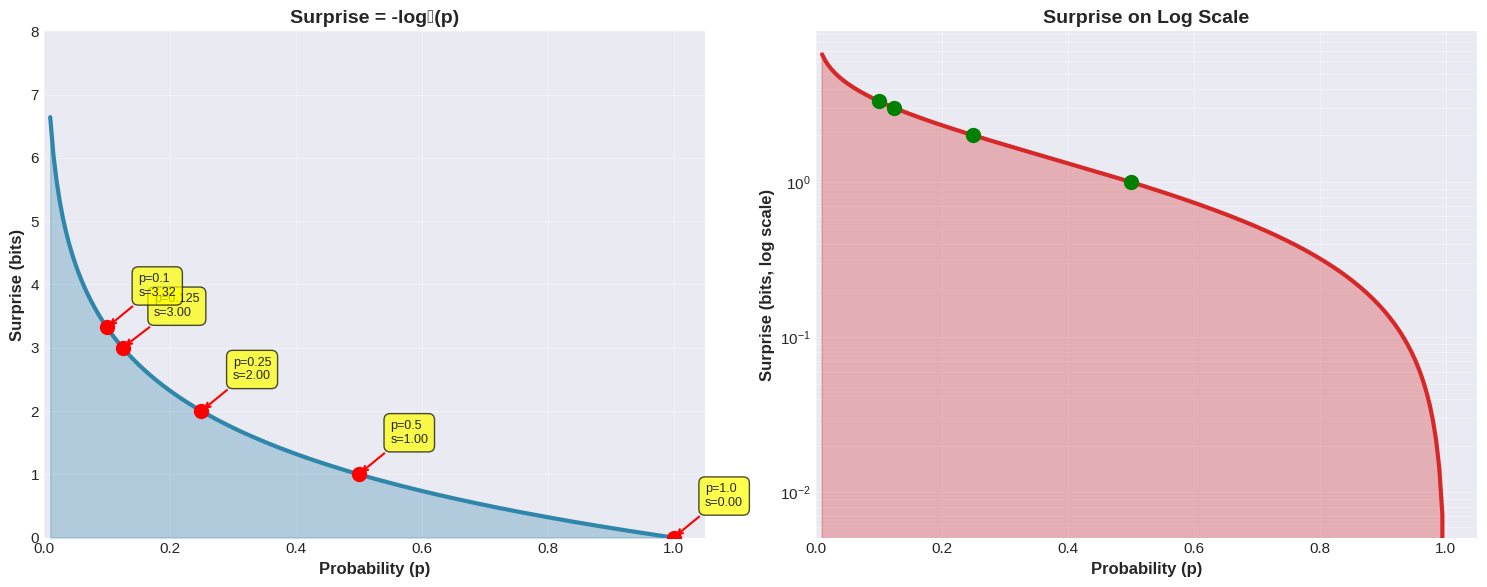


MATHEMATICAL INSIGHT:
  The logarithm creates an INVERSE relationship:
  • High probability (p→1) → Low surprise (→0)
  • Low probability (p→0) → High surprise (→∞)


In [10]:
# Visualize surprise function
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Generate probability values
p_values = np.linspace(0.01, 1.0, 200)
surprise_values = surprise(p_values)

# Plot 1: Surprise vs Probability
axes[0].plot(p_values, surprise_values, linewidth=3, color='#2E86AB')
axes[0].fill_between(p_values, surprise_values, alpha=0.3, color='#2E86AB')

# Mark key points
key_points = [(1.0, 0.0), (0.5, 1.0), (0.25, 2.0), (0.125, 3.0), (0.1, 3.32)]
for p, s in key_points:
    axes[0].plot(p, s, 'ro', markersize=10)
    axes[0].annotate(f'p={p}\ns={s:.2f}', xy=(p, s), xytext=(p+0.05, s+0.5),
                    fontsize=9, ha='left',
                    bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7),
                    arrowprops=dict(arrowstyle='->', color='red', lw=1.5))

axes[0].set_xlabel('Probability (p)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Surprise (bits)', fontsize=12, fontweight='bold')
axes[0].set_title('Surprise = -log₂(p)', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim([0, 1.05])
axes[0].set_ylim([0, 8])

# Plot 2: Log scale
axes[1].semilogy(p_values, surprise_values, linewidth=3, color='#D62828')
axes[1].fill_between(p_values, surprise_values, alpha=0.3, color='#D62828')

for p, s in key_points:
    axes[1].plot(p, s, 'go', markersize=10)

axes[1].set_xlabel('Probability (p)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Surprise (bits, log scale)', fontsize=12, fontweight='bold')
axes[1].set_title('Surprise on Log Scale', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, which='both')
axes[1].set_xlim([0, 1.05])

plt.tight_layout()
plt.show()

print('\nMATHEMATICAL INSIGHT:')
print('  The logarithm creates an INVERSE relationship:')
print('  • High probability (p→1) → Low surprise (→0)')
print('  • Low probability (p→0) → High surprise (→∞)')

---

# Part 2: From Surprise to Entropy

## What is Entropy? (ENTROPY = AVERAGE SURPRISE)

**Entropy** is the **Expected Value (average)** of the Surprise.

```
┌─────────────────────────────────────────────────────────────┐
│              ENTROPY FORMULA DERIVATION                     │
├─────────────────────────────────────────────────────────────┤
│                                                             │
│  Entropy = Expected Value of Surprise                      │
│                                                             │
│  H = E[Surprise]                                           │
│    = Σ p(x) × Surprise(x)                                  │
│    = Σ p(x) × (-log₂(p(x)))                                │
│                                                             │
│  Rearranging:                                              │
│                                                             │
│  H = -Σ p(x) log₂(p(x))                                    │
│                                                             │
│  Where:                                                    │
│  • H = Entropy (in bits)                                   │
│  • p(x) = Probability of outcome x                         │
│  • Σ = Sum over all possible outcomes                      │
│                                                             │
│  Interpretation:                                           │
│  • Entropy measures AVERAGE uncertainty                    │
│  • Higher entropy = More unpredictable                     │
│  • Lower entropy = More predictable                        │
│                                                             │
└─────────────────────────────────────────────────────────────┘
```

# Understanding Entropy: p(x) × Surprise(x)

## Question 1: What does p(x) × Surprise(x) mean intuitively?

### Think of it as: **"How much does this outcome contribute to overall uncertainty?"**

---

## Example 1: Weather Prediction

Imagine predicting weather with these outcomes:

| Outcome | Probability p(x) | Surprise -log₂(p(x)) | **Contribution p(x) × Surprise(x)** |
|---------|------------------|----------------------|-------------------------------------|
| Sunny   | 0.7 (70%)       | 0.51 bits           | 0.7 × 0.51 = **0.36 bits**         |
| Rainy   | 0.3 (30%)       | 1.74 bits           | 0.3 × 1.74 = **0.52 bits**         |

### What does each contribution mean?

**Sunny (0.36 bits):**
- Happens often (70% of the time)
- Not very surprising when it happens (0.51 bits)
- But because it happens **frequently**, it contributes 0.36 bits to average uncertainty

**Rainy (0.52 bits):**
- Happens less often (30% of the time)
- More surprising when it happens (1.74 bits)
- Even though it's rare, when weighted by frequency, it contributes 0.52 bits

**Total Entropy = 0.36 + 0.52 = 0.88 bits** ← Average uncertainty per day

---

## Example 2: Extreme Cases

### Case A: Certain Event
```
p(x) = 1.0 (100% certain)
Surprise(x) = -log₂(1.0) = 0 bits

Contribution = 1.0 × 0 = 0 bits
```
**Intuition:** It always happens, so no surprise, contributes **nothing** to uncertainty.

### Case B: Impossible Event
```
p(x) = 0.0 (never happens)
Surprise(x) = -log₂(0.0) = ∞ bits (infinitely surprising!)

Contribution = 0.0 × ∞ = 0 bits
```
**Intuition:** It would be infinitely surprising... but it **never happens**, so contributes **nothing** to average uncertainty.

### Case C: Rare but Possible Event
```
p(x) = 0.01 (1% chance)
Surprise(x) = -log₂(0.01) = 6.64 bits

Contribution = 0.01 × 6.64 = 0.066 bits
```
**Intuition:** Very surprising when it happens, but happens so **rarely** that its contribution to average uncertainty is small.

---

## The Key Insight

### `p(x) × Surprise(x)` balances two factors:

1. **How surprising is it?** (Surprise)
2. **How often does it happen?** (Probability)

---

## A Simpler Explanation: Using Money! 💰

Imagine you play a lottery **every day for 100 days**.

### Scenario: Two Possible Outcomes

| Outcome | Probability | Prize Money (Surprise) | What Actually Happens |
|---------|-------------|------------------------|----------------------|
| **Win** | 10% (0.1) | $100 | You win **10 times** out of 100 days |
| **Lose** | 90% (0.9) | $0 | You lose **90 times** out of 100 days |

### Question: How much money do you make **on average per day**?

**Method 1: Count Everything**
```
Total money = (10 wins × $100) + (90 losses × $0)
            = $1000 + $0
            = $1000 over 100 days

Average per day = $1000 ÷ 100 = $10/day
```

**Method 2: Use the Formula (p × value)**
```
Average = p(win) × prize(win) + p(lose) × prize(lose)
        = 0.1 × $100 + 0.9 × $0
        = $10 + $0
        = $10/day
```

**Same answer!** ✓

---

## Now Replace Money with Information

Instead of **"How much money on average?"**, we ask **"How much surprise on average?"**

| Outcome | Probability p(x) | Surprise (bits) | Contribution p(x) × Surprise(x) |
|---------|------------------|-----------------|--------------------------------|
| **Sunny** | 0.7 | 0.51 bits | 0.7 × 0.51 = **0.36 bits** |
| **Rainy** | 0.3 | 1.74 bits | 0.3 × 1.74 = **0.52 bits** |

### What This Means in Plain English:

**Over 100 days:**
- **70 days** will be sunny → You experience 0.51 bits of surprise **70 times**
  - Total surprise from sunny days = 70 × 0.51 = **35.7 bits**
  
- **30 days** will be rainy → You experience 1.74 bits of surprise **30 times**
  - Total surprise from rainy days = 30 × 1.74 = **52.2 bits**

**Total surprise over 100 days = 35.7 + 52.2 = 87.9 bits**

**Average surprise per day = 87.9 ÷ 100 = 0.879 bits ≈ 0.88 bits**

---

## The Formula is Just a Shortcut!

Instead of:
1. Counting 100 days
2. Adding up all surprises
3. Dividing by 100

We use:
```
Average = p(sunny) × Surprise(sunny) + p(rainy) × Surprise(rainy)
        = 0.7 × 0.51 + 0.3 × 1.74
        = 0.88 bits
```

**It's the same thing!** The formula just saves time.

---

## Another Analogy: Restaurant Menu

You go to a restaurant **every week**. Here's what you order:

| Meal | How Often? | Price | Your Spending |
|------|------------|-------|---------------|
| **Pizza** | 50% of visits | $10 | 0.5 × $10 = **$5** |
| **Burger** | 30% of visits | $8 | 0.3 × $8 = **$2.40** |
| **Salad** | 20% of visits | $12 | 0.2 × $12 = **$2.40** |

**Average spending per visit = $5 + $2.40 + $2.40 = $9.80**

This is **exactly** what `p(x) × value(x)` calculates!

---

## Visual Way to Think About It

Imagine a **bag of colored balls**:

```
🔴🔴🔴🔴🔴🔴🔴 (7 red balls)    → p = 0.7, Surprise = 0.51 bits
🔵🔵🔵 (3 blue balls)            → p = 0.3, Surprise = 1.74 bits
```

**You draw one ball randomly, note the color, put it back, and repeat.**

After 1000 draws:
- You'll draw red **~700 times** → Experience 0.51 bits of surprise each time
- You'll draw blue **~300 times** → Experience 1.74 bits of surprise each time

**Average surprise per draw:**
```
= (700 × 0.51 + 300 × 1.74) ÷ 1000
= (357 + 522) ÷ 1000
= 879 ÷ 1000
= 0.879 bits
```

Or using the shortcut:
```
= 0.7 × 0.51 + 0.3 × 1.74
= 0.879 bits
```

---

## Summary of p(x) × Surprise(x)

**`p(x) × Surprise(x)` is NOT a weird mathematical trick.**

It's simply:
> **"How often does this happen?"** × **"How surprising is it when it happens?"**

This gives you the **contribution to the average**.

Add up all contributions → You get the **average surprise** (Entropy).

**Entropy is just a weighted average of surprise!**

---

---

# Question 2: So Entropy = Average Surprise? Why not just sum all surprises and divide by n?

## Short Answer:
**Yes, Entropy = Average Surprise** ✓

But the question "why not just sum and divide by n?" reveals a **crucial distinction** about averages!

---

## Two Types of Averages

### Type 1: Simple Average (Sum and Divide)
**When you have actual observations:**

```
You observe: Sunny, Sunny, Rainy, Sunny, Sunny, Rainy, Sunny, Sunny, Sunny, Sunny

Surprises: 0.51, 0.51, 1.74, 0.51, 0.51, 1.74, 0.51, 0.51, 0.51, 0.51

Average = (0.51 + 0.51 + 1.74 + 0.51 + 0.51 + 1.74 + 0.51 + 0.51 + 0.51 + 0.51) ÷ 10
        = 8.06 ÷ 10
        = 0.806 bits
```

This works! ✓

---

### Type 2: Weighted Average (What Entropy Uses)
**When you only know probabilities (before observing):**

```
You know: p(Sunny) = 0.7, p(Rainy) = 0.3

Average = p(Sunny) × Surprise(Sunny) + p(Rainy) × Surprise(Rainy)
        = 0.7 × 0.51 + 0.3 × 1.74
        = 0.357 + 0.522
        = 0.879 bits
```

---

## Why Are They Different?

### Your Method (Sum ÷ n):
```
Average = Σ Surprise(x) ÷ n
```
**Problem:** What is `n`?

- If you have **actual data**, n = number of observations ✓
- If you only have **probabilities**, there's no "n" ✗

---

## The Real Question: What Are You Averaging Over?

### Scenario A: You Have Data

```
Data: [Sunny, Sunny, Rainy, Sunny, Rainy]

Method 1 (Sum and divide):
Average = (Surprise(Sunny) + Surprise(Sunny) + Surprise(Rainy) + 
           Surprise(Sunny) + Surprise(Rainy)) ÷ 5
        = (0.51 + 0.51 + 1.74 + 0.51 + 1.74) ÷ 5
        = 5.01 ÷ 5
        = 1.002 bits

Method 2 (Entropy way):
Count: 3 Sunny, 2 Rainy
Average = (3/5) × 0.51 + (2/5) × 1.74
        = 0.6 × 0.51 + 0.4 × 1.74
        = 0.306 + 0.696
        = 1.002 bits
```

**SAME ANSWER!** ✓✓✓

---

### Scenario B: You Only Have Probabilities (No Data Yet)

```
Given: p(Sunny) = 0.7, p(Rainy) = 0.3

Your method:
Average = Σ Surprise(x) ÷ n
        = (Surprise(Sunny) + Surprise(Rainy)) ÷ 2
        = (0.51 + 1.74) ÷ 2
        = 2.25 ÷ 2
        = 1.125 bits  ❌ WRONG!
```

**Why wrong?** You're treating Sunny and Rainy as **equally likely** (dividing by 2), but they're NOT!

**Correct method (Entropy):**
```
Average = p(Sunny) × Surprise(Sunny) + p(Rainy) × Surprise(Rainy)
        = 0.7 × 0.51 + 0.3 × 1.74
        = 0.879 bits  ✓ CORRECT!
```

---

## The Key Insight

### Your Method Works When:
```
Average = Σ Surprise(xᵢ) ÷ n

Where xᵢ are actual observations
```

**This is equivalent to:**
```
Average = Σ (count(x)/n) × Surprise(x)
        = Σ p̂(x) × Surprise(x)  ← Estimated probability from data
```

**This IS the entropy formula!** You're just computing probabilities implicitly by counting.

---

## Mathematical Proof They're The Same

### Your way (with data):
```
Data: [x₁, x₂, x₃, ..., xₙ]

Average = (Surprise(x₁) + Surprise(x₂) + ... + Surprise(xₙ)) ÷ n
```

### Entropy way:
```
Group identical outcomes:
- Outcome A appears nₐ times
- Outcome B appears nᵦ times
- etc.

Average = (nₐ × Surprise(A) + nᵦ × Surprise(B) + ...) ÷ n
        = (nₐ/n) × Surprise(A) + (nᵦ/n) × Surprise(B) + ...
        = p(A) × Surprise(A) + p(B) × Surprise(B) + ...
```

**They're identical!** Your method just computes probabilities by counting.

---

## Why Use the Weighted Formula?

### Reason 1: You Don't Always Have Data
```
Question: "What's the entropy of a fair die?"

You don't need to roll it 1000 times!
Just use: p(each face) = 1/6

Entropy = 6 × (1/6 × log₂(6))
        = log₂(6)
        = 2.58 bits
```

### Reason 2: It's More General
```
Weighted average works for:
- Theoretical probabilities (before collecting data)
- Empirical probabilities (from data)
- Continuous distributions (where "n" is infinite!)
```

### Reason 3: It's More Efficient
```
Your way with data:
- 1000 observations → Sum 1000 terms

Entropy way:
- 1000 observations of 2 outcomes → Sum 2 terms!
  (Just count how many of each, compute probabilities)
```

---

## Final Example to Prove It

### Data: 7 Sunny days, 3 Rainy days

**Your method (sum and divide):**
```
Average = (7 × 0.51 + 3 × 1.74) ÷ 10
        = (3.57 + 5.22) ÷ 10
        = 8.79 ÷ 10
        = 0.879 bits ✓
```

**Entropy method (weighted average):**
```
p(Sunny) = 7/10 = 0.7
p(Rainy) = 3/10 = 0.3

Entropy = 0.7 × 0.51 + 0.3 × 1.74
        = 0.357 + 0.522
        = 0.879 bits ✓
```

**SAME!** 🎉

---

## Summary: Entropy = Average Surprise

### Your Intuition is 100% CORRECT! ✓

```
Entropy = Average Surprise
```

### Your Method Works Too!

```
If you have data: Average = Σ Surprise(xᵢ) ÷ n
```

### But Entropy Formula is More General:

```
Entropy = Σ p(x) × Surprise(x)
```

**They give the same answer when you have data!**

The entropy formula just:
1. Works even without data (using theoretical probabilities)
2. Groups identical outcomes for efficiency
3. Explicitly shows the probability weighting

---

## Key Takeaway

> **Your method implicitly computes probabilities by counting, while entropy explicitly uses probabilities!**
>
> When you sum all surprises and divide by n, you're actually computing:
> ```
> Σ Surprise(xᵢ) ÷ n = Σ (count(x)/n) × Surprise(x) = Σ p(x) × Surprise(x)
> ```
> 
> **It's the same formula, just written differently!** 🎯

In [5]:
# Implement entropy function
def entropy(probabilities):
    """
    Calculate entropy for a probability distribution.
    
    Args:
        probabilities: Array of probabilities (must sum to 1)
    
    Returns:
        Entropy in bits
    """
    # Remove zero probabilities to avoid log(0)
    p = np.array(probabilities)
    p = p[p > 0]
    return -np.sum(p * np.log2(p))

print('✓ Entropy function implemented')
print('✓ Ready to calculate entropy for distributions')

✓ Entropy function implemented
✓ Ready to calculate entropy for distributions


---

# Part 3: Worked Example - Fair Coin

```
┌─────────────────────────────────────────────────────────────┐
│         ENTROPY CALCULATION: FAIR COIN                      │
├─────────────────────────────────────────────────────────────┤
│                                                             │
│  Outcomes: {Heads, Tails}                                  │
│  Probabilities: p(H) = 0.5, p(T) = 0.5                     │
│                                                             │
│  Step 1: Calculate surprise for each outcome               │
│  ┌──────────────────────────────────────┐                 │
│  │ Heads: -log₂(0.5) = 1.0 bits         │                 │
│  │ Tails: -log₂(0.5) = 1.0 bits         │                 │
│  └──────────────────────────────────────┘                 │
│                                                             │
│  Step 2: Weight by probability                             │
│  ┌──────────────────────────────────────┐                 │
│  │ Heads: 0.5 × 1.0 = 0.5               │                 │
│  │ Tails: 0.5 × 1.0 = 0.5               │                 │
│  └──────────────────────────────────────┘                 │
│                                                             │
│  Step 3: Sum (expected value)                              │
│  ┌──────────────────────────────────────┐                 │
│  │ Entropy = 0.5 + 0.5 = 1.0 bits       │                 │
│  └──────────────────────────────────────┘                 │
│                                                             │
│  Interpretation:                                           │
│  • Maximum uncertainty for binary event                    │
│  • Need 1 bit to encode the outcome                        │
│  • Perfectly balanced distribution                         │
│                                                             │
└─────────────────────────────────────────────────────────────┘
```

In [6]:
# Example 1: Fair coin (detailed calculation)
print('EXAMPLE 1: FAIR COIN (DETAILED CALCULATION)')
print('='*70)

fair_coin = np.array([0.5, 0.5])
outcomes = ['Heads', 'Tails']

print(f'\nProbabilities: {fair_coin}')
print('\nStep-by-step calculation:')
print('-'*70)

total = 0.0
for outcome, p in zip(outcomes, fair_coin):
    s = surprise(p)
    contribution = p * s
    total += contribution
    print(f'{outcome}:')
    print(f'  Probability: {p:.3f}')
    print(f'  Surprise: -log₂({p:.3f}) = {s:.3f} bits')
    print(f'  Contribution: {p:.3f} × {s:.3f} = {contribution:.3f}')
    print()

print(f'Total Entropy: {total:.3f} bits')
print(f'Verification: {entropy(fair_coin):.3f} bits')
print('='*70)
print('\nINTERPRETATION:')
print('  Maximum uncertainty for a binary event!')
print('  This is the most unpredictable coin flip possible.')

EXAMPLE 1: FAIR COIN (DETAILED CALCULATION)

Probabilities: [0.5 0.5]

Step-by-step calculation:
----------------------------------------------------------------------
Heads:
  Probability: 0.500
  Surprise: -log₂(0.500) = 1.000 bits
  Contribution: 0.500 × 1.000 = 0.500

Tails:
  Probability: 0.500
  Surprise: -log₂(0.500) = 1.000 bits
  Contribution: 0.500 × 1.000 = 0.500

Total Entropy: 1.000 bits
Verification: 1.000 bits

INTERPRETATION:
  Maximum uncertainty for a binary event!
  This is the most unpredictable coin flip possible.


---

# Part 4: Worked Example - Biased Coin

```
┌─────────────────────────────────────────────────────────────┐
│         ENTROPY CALCULATION: BIASED COIN                    │
├─────────────────────────────────────────────────────────────┤
│                                                             │
│  Outcomes: {Heads, Tails}                                  │
│  Probabilities: p(H) = 0.9, p(T) = 0.1                     │
│                                                             │
│  Step 1: Calculate surprise                                │
│  ┌──────────────────────────────────────┐                 │
│  │ Heads: -log₂(0.9) = 0.152 bits       │                 │
│  │ Tails: -log₂(0.1) = 3.322 bits       │                 │
│  └──────────────────────────────────────┘                 │
│                                                             │
│  Notice: Tails is rare, so surprise is HIGH!               │
│                                                             │
│  Step 2: Weight by probability                             │
│  ┌──────────────────────────────────────┐                 │
│  │ Heads: 0.9 × 0.152 = 0.137           │                 │
│  │ Tails: 0.1 × 3.322 = 0.332           │                 │
│  └──────────────────────────────────────┘                 │
│                                                             │
│  Step 3: Sum                                               │
│  ┌──────────────────────────────────────┐                 │
│  │ Entropy = 0.137 + 0.332 = 0.469 bits │                 │
│  └──────────────────────────────────────┘                 │
│                                                             │
│  Comparison:                                               │
│  • Fair coin: 1.000 bits (high uncertainty)                │
│  • Biased coin: 0.469 bits (low uncertainty)               │
│                                                             │
│  Interpretation:                                           │
│  • Lower entropy = More predictable                        │
│  • We're pretty sure it will be Heads!                     │
│                                                             │
└─────────────────────────────────────────────────────────────┘
```

In [7]:
# Example 2: Biased coin
print('EXAMPLE 2: BIASED COIN (90% HEADS, 10% TAILS)')
print('='*70)

biased_coin = np.array([0.9, 0.1])

print(f'\nProbabilities: {biased_coin}')
print('\nStep-by-step calculation:')
print('-'*70)

total = 0.0
for outcome, p in zip(outcomes, biased_coin):
    s = surprise(p)
    contribution = p * s
    total += contribution
    print(f'{outcome}:')
    print(f'  Probability: {p:.3f}')
    print(f'  Surprise: -log₂({p:.3f}) = {s:.3f} bits')
    print(f'  Contribution: {p:.3f} × {s:.3f} = {contribution:.3f}')
    if p < 0.5:
        print(f'  ⚠️  Rare event → High surprise!')
    print()

print(f'Total Entropy: {total:.3f} bits')
print(f'Verification: {entropy(biased_coin):.3f} bits')
print('='*70)
print('\nCOMPARISON:')
print(f'  Fair coin entropy:   {entropy(fair_coin):.3f} bits')
print(f'  Biased coin entropy: {entropy(biased_coin):.3f} bits')
print('\n  Lower entropy = More predictable!')

EXAMPLE 2: BIASED COIN (90% HEADS, 10% TAILS)

Probabilities: [0.9 0.1]

Step-by-step calculation:
----------------------------------------------------------------------
Heads:
  Probability: 0.900
  Surprise: -log₂(0.900) = 0.152 bits
  Contribution: 0.900 × 0.152 = 0.137

Tails:
  Probability: 0.100
  Surprise: -log₂(0.100) = 3.322 bits
  Contribution: 0.100 × 3.322 = 0.332
  ⚠️  Rare event → High surprise!

Total Entropy: 0.469 bits
Verification: 0.469 bits

COMPARISON:
  Fair coin entropy:   1.000 bits
  Biased coin entropy: 0.469 bits

  Lower entropy = More predictable!


---

# Part 5: Visualizing Entropy

Let's visualize how entropy changes for different distributions:

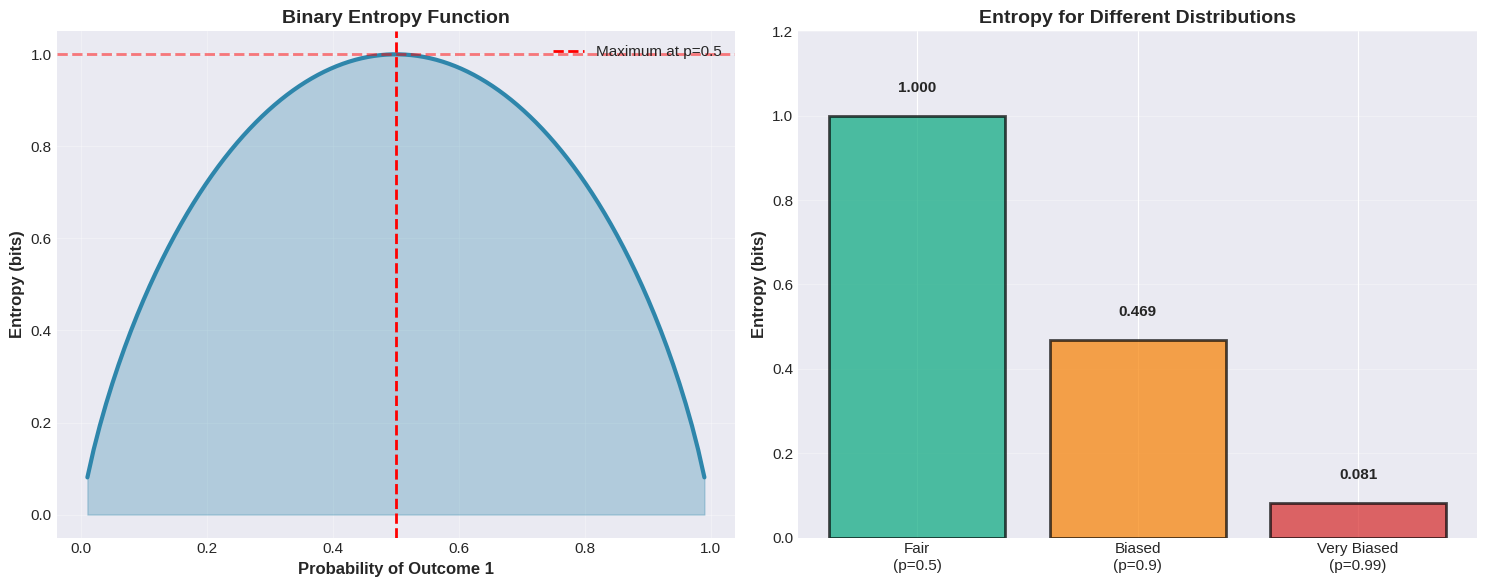


KEY INSIGHTS:
  1. Binary entropy is maximum at p=0.5 (uniform distribution)
  2. Skewed distributions have lower entropy
  3. Entropy measures average uncertainty


In [8]:
# Visualize binary entropy function
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Generate probability values
p1_values = np.linspace(0.01, 0.99, 100)
entropy_values = [entropy([p, 1-p]) for p in p1_values]

# Plot 1: Entropy vs Probability
axes[0].plot(p1_values, entropy_values, linewidth=3, color='#2E86AB')
axes[0].fill_between(p1_values, entropy_values, alpha=0.3, color='#2E86AB')
axes[0].axvline(x=0.5, color='red', linestyle='--', linewidth=2, label='Maximum at p=0.5')
axes[0].axhline(y=1.0, color='red', linestyle='--', linewidth=2, alpha=0.5)
axes[0].set_xlabel('Probability of Outcome 1', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Entropy (bits)', fontsize=12, fontweight='bold')
axes[0].set_title('Binary Entropy Function', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Compare distributions
examples = [
    ([0.5, 0.5], 'Fair\n(p=0.5)', '#06A77D'),
    ([0.9, 0.1], 'Biased\n(p=0.9)', '#F77F00'),
    ([0.99, 0.01], 'Very Biased\n(p=0.99)', '#D62828')
]

x_pos = np.arange(len(examples))
entropies = [entropy(dist) for dist, _, _ in examples]
colors = [color for _, _, color in examples]
labels = [label for _, label, _ in examples]

bars = axes[1].bar(x_pos, entropies, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(labels)
axes[1].set_ylabel('Entropy (bits)', fontsize=12, fontweight='bold')
axes[1].set_title('Entropy for Different Distributions', fontsize=14, fontweight='bold')
axes[1].set_ylim([0, 1.2])
axes[1].grid(True, alpha=0.3, axis='y')

for bar, h in zip(bars, entropies):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.05,
                   f'{h:.3f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print('\nKEY INSIGHTS:')
print('  1. Binary entropy is maximum at p=0.5 (uniform distribution)')
print('  2. Skewed distributions have lower entropy')
print('  3. Entropy measures average uncertainty')

---

# Summary

## Key Takeaways

1. **Surprise Formula**: Surprise(x) = -log₂(p(x))
   - Measures information content in bits
   - Inverse relationship with probability
   - Additive for independent events

2. **Entropy Formula**: H = -Σ p(x) log₂(p(x))
   - Expected value (average) of surprise
   - Measures average uncertainty
   - Higher entropy = more unpredictable

3. **Worked Examples**:
   - Fair coin: H = 1.0 bits (maximum for binary)
   - Biased coin (90/10): H = 0.469 bits
   - Certain event: H = 0.0 bits

4. **Interpretation**:
   - Entropy quantifies uncertainty
   - Uniform distributions have maximum entropy
   - Skewed distributions have lower entropy

## What's Next?

In **Part B1**, we'll:
- Learn about ArgMax and Softmax
- See why neural networks use Softmax
- Understand the difference between ArgMax (inference) and Softmax (training)
- Calculate Softmax step-by-step

**Double Bam!** 💥💥